In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print(" "*20 + "WEEK 1: DATA PREPROCESSING")
print("="*70)
print("\n✓ Libraries imported successfully!\n")



                    WEEK 1: DATA PREPROCESSING

✓ Libraries imported successfully!



In [5]:
# Create Raw Dataset with Missing Values
print("[STEP 1] Creating Raw House Price Dataset...")
print("-"*70)

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Create synthetic house price dataset with realistic features
data = {
    'square_feet': np.random.randint(800, 5000, n_samples),
    'bedrooms': np.random.randint(1, 7, n_samples),
    'bathrooms': np.random.randint(1, 5, n_samples),
    'age_years': np.random.randint(0, 100, n_samples),
    'garage_spaces': np.random.randint(0, 4, n_samples),
    'lot_size': np.random.randint(2000, 20000, n_samples),
    'num_floors': np.random.randint(1, 4, n_samples),
    'has_basement': np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
    'has_pool': np.random.choice([0, 1], n_samples, p=[0.8, 0.2]),
    'has_fireplace': np.random.choice([0, 1], n_samples, p=[0.6, 0.4]),
    'neighborhood_score': np.random.uniform(1, 10, n_samples),
    'distance_to_city': np.random.uniform(1, 50, n_samples),
}

# Create DataFrame
df = pd.DataFrame(data)


[STEP 1] Creating Raw House Price Dataset...
----------------------------------------------------------------------


In [6]:
# Create DataFrame
df = pd.DataFrame(data)

# Generate price based on features (realistic relationship)
df['price'] = (
    df['square_feet'] * 150 +  # Base price per sq ft
    df['bedrooms'] * 10000 +  # Bedroom value
    df['bathrooms'] * 8000 +  # Bathroom value
    df['garage_spaces'] * 5000 +  # Garage value
    df['lot_size'] * 2 +  # Lot size value
    (100 - df['age_years']) * 500 +  # Newer = higher price
    df['has_basement'] * 15000 +  # Basement bonus
    df['has_pool'] * 20000 +  # Pool bonus
    df['has_fireplace'] * 5000 +  # Fireplace bonus
    df['neighborhood_score'] * 8000 +  # Neighborhood impact
    -df['distance_to_city'] * 800 +  # Closer = higher price
    np.random.normal(0, 30000, n_samples)  # Random noise
)


In [7]:
# Ensure positive prices
df['price'] = np.abs(df['price'])

print(f"✓ Dataset created with {n_samples} samples and {len(df.columns)} features")
print(f"✓ Target variable: 'price'")
print(f"\nDataset shape: {df.shape}")
print(f"Features: {list(df.columns)}")



✓ Dataset created with 1000 samples and 13 features
✓ Target variable: 'price'

Dataset shape: (1000, 13)
Features: ['square_feet', 'bedrooms', 'bathrooms', 'age_years', 'garage_spaces', 'lot_size', 'num_floors', 'has_basement', 'has_pool', 'has_fireplace', 'neighborhood_score', 'distance_to_city', 'price']


In [8]:
#Introduce Missing Values (Realistic Scenario)
print("\n[STEP 2] Introducing Missing Values...")
print("-"*70)

# Introduce missing values randomly (5-15% per column)
missing_columns = ['square_feet', 'age_years', 'lot_size', 'neighborhood_score',
                   'distance_to_city', 'garage_spaces']

for col in missing_columns:
    missing_pct = np.random.uniform(0.05, 0.15)
    missing_indices = np.random.choice(df.index, int(len(df) * missing_pct), replace=False)
    df.loc[missing_indices, col] = np.nan

print("✓ Missing values introduced")
print("\nMissing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of data missing: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")




[STEP 2] Introducing Missing Values...
----------------------------------------------------------------------
✓ Missing values introduced

Missing values per column:
square_feet            78
bedrooms                0
bathrooms               0
age_years              74
garage_spaces         119
lot_size               89
num_floors              0
has_basement            0
has_pool                0
has_fireplace           0
neighborhood_score     54
distance_to_city      144
price                   0
dtype: int64

Total missing values: 558
Percentage of data missing: 4.29%


In [9]:
df.to_csv('house_prices_raw.csv', index=False)
print("\n✓ Raw dataset saved as 'house_prices_raw.csv'")



✓ Raw dataset saved as 'house_prices_raw.csv'


In [10]:
# Exploratory Data Analysis (EDA)
print("\n[STEP 3] Exploratory Data Analysis...")
print("-"*70)

# Basic statistics
print("\nDataset Info:")
print(df.info())

print("\n" + "="*70)
print("Statistical Summary:")
print("="*70)
print(df.describe())


[STEP 3] Exploratory Data Analysis...
----------------------------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   square_feet         922 non-null    float64
 1   bedrooms            1000 non-null   int64  
 2   bathrooms           1000 non-null   int64  
 3   age_years           926 non-null    float64
 4   garage_spaces       881 non-null    float64
 5   lot_size            911 non-null    float64
 6   num_floors          1000 non-null   int64  
 7   has_basement        1000 non-null   int64  
 8   has_pool            1000 non-null   int64  
 9   has_fireplace       1000 non-null   int64  
 10  neighborhood_score  946 non-null    float64
 11  distance_to_city    856 non-null    float64
 12  price               1000 non-null   float64
dtypes: float64(7), int64(6)
memor

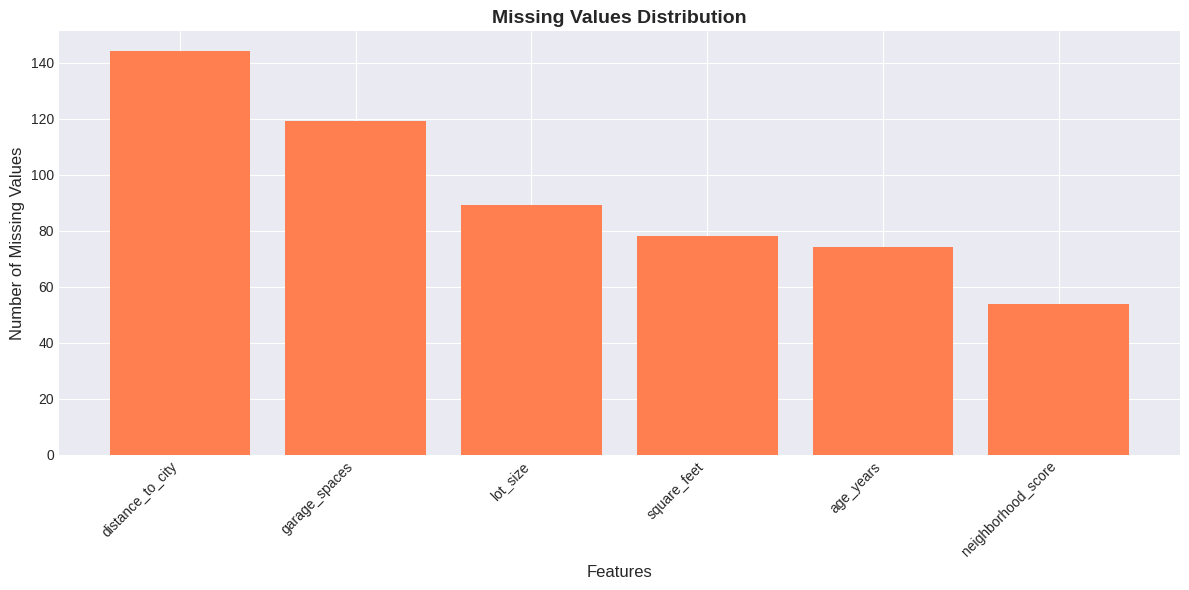


✓ Missing values plot saved


In [11]:
# Visualize missing values
plt.figure(figsize=(12, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
plt.bar(missing_data.index, missing_data.values, color='coral')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.title('Missing Values Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Missing values plot saved")




[STEP 4] Creating Distribution Plots...
----------------------------------------------------------------------


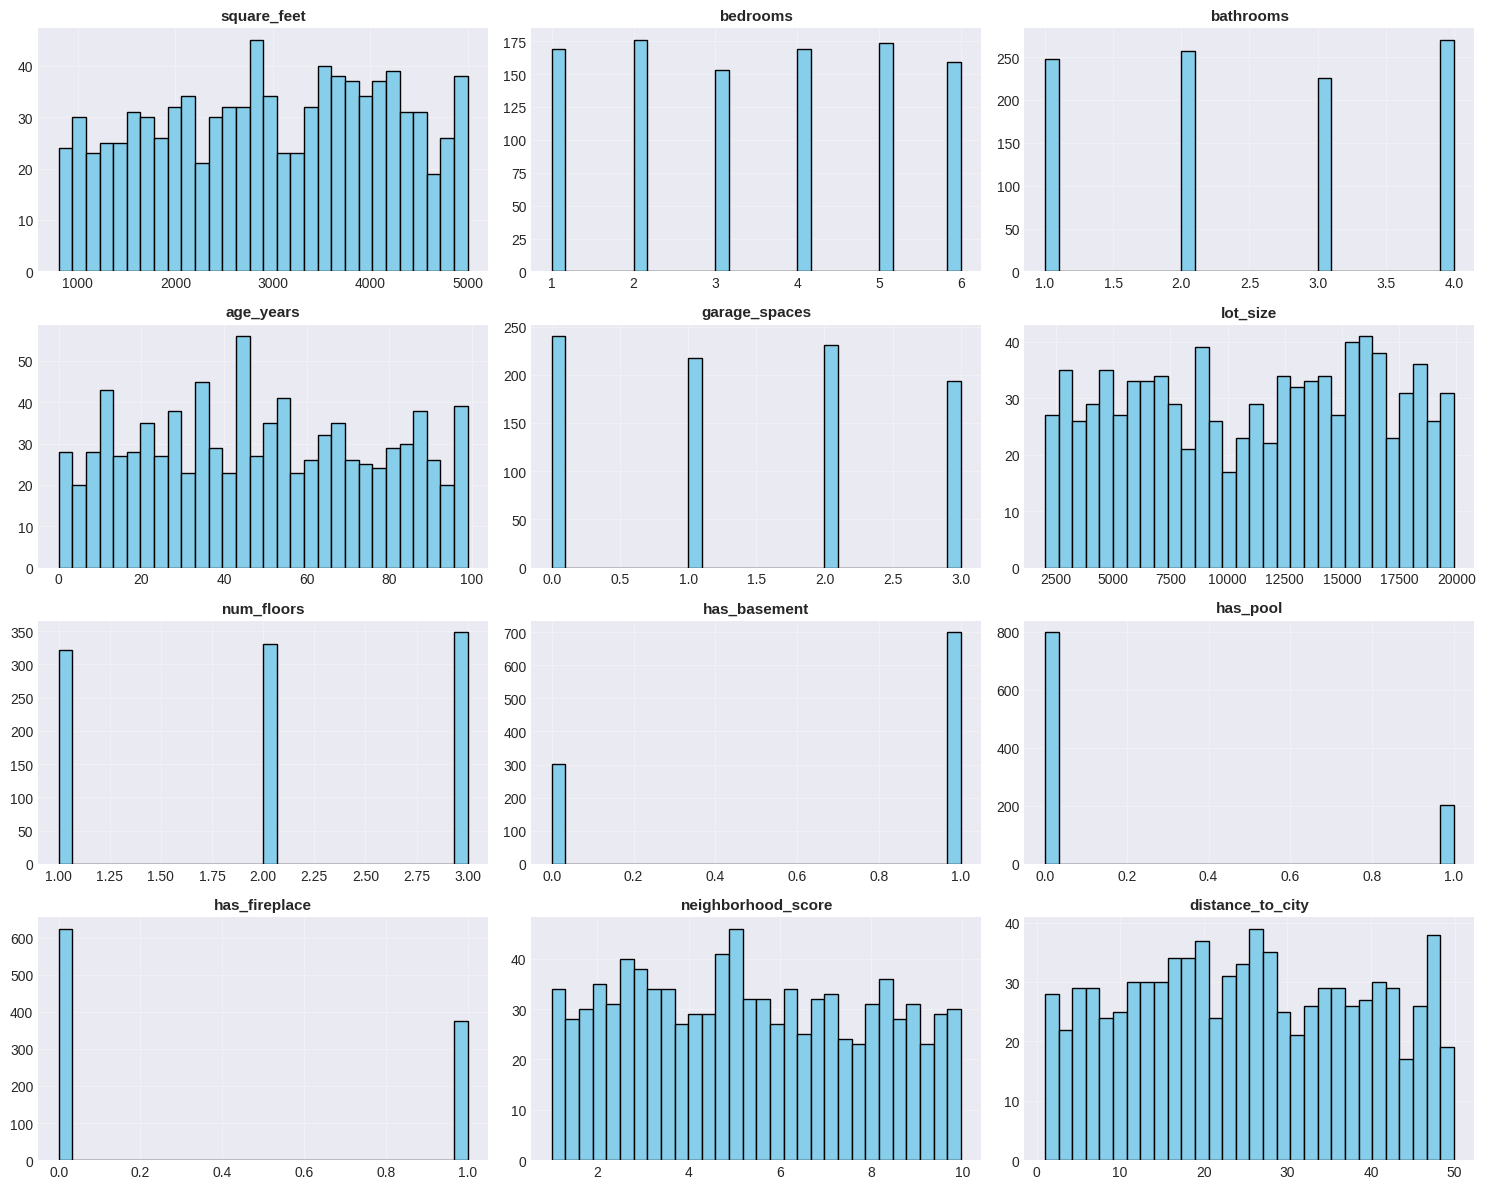

✓ Distribution plots saved


In [12]:
#  Distribution Plots
print("\n[STEP 4] Creating Distribution Plots...")
print("-"*70)

# Plot distributions of numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df[col].dropna().hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Distribution plots saved")



[STEP 5] Correlation Analysis...
----------------------------------------------------------------------


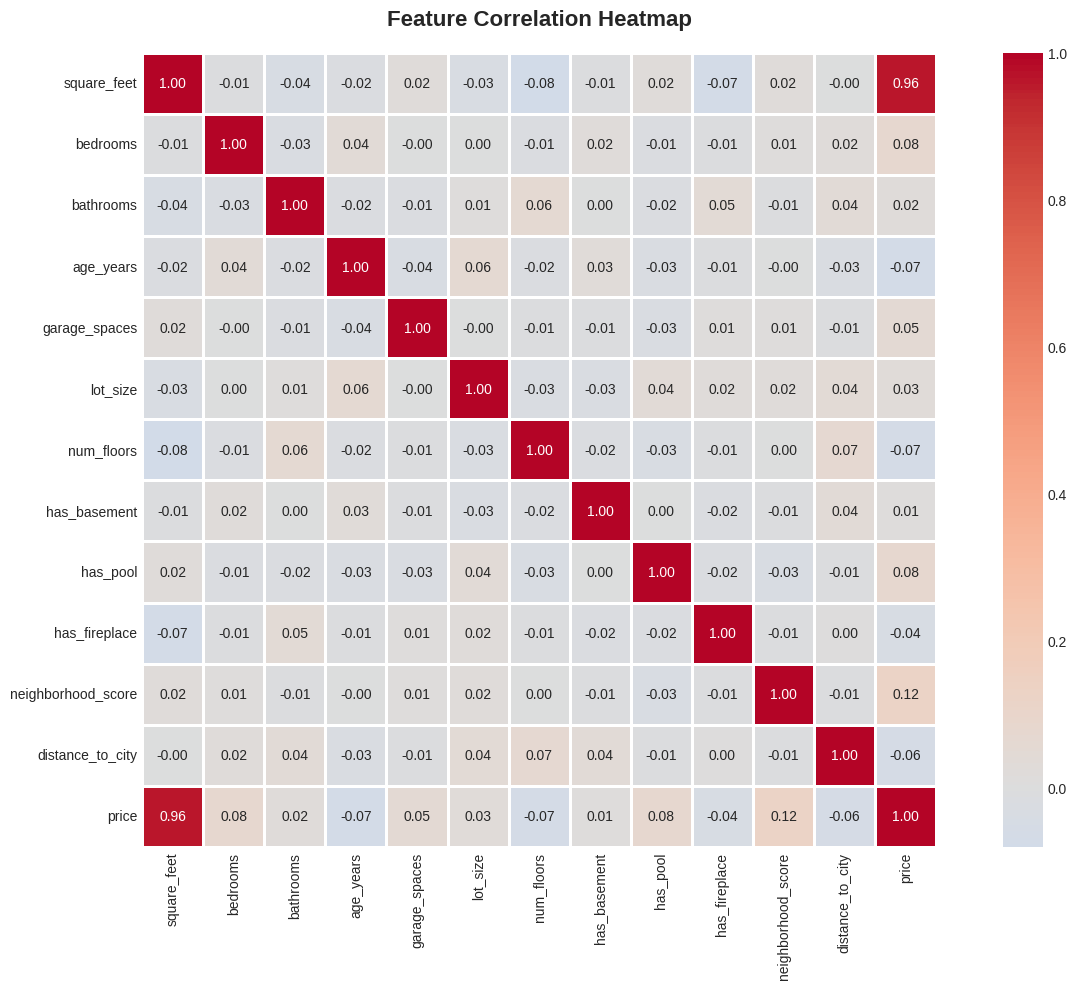


Correlation with Price (sorted):
price                 1.000000
square_feet           0.964312
neighborhood_score    0.122744
bedrooms              0.079213
has_pool              0.075600
garage_spaces         0.052531
lot_size              0.030744
bathrooms             0.018198
has_basement          0.014402
has_fireplace        -0.039602
distance_to_city     -0.055949
num_floors           -0.066006
age_years            -0.072825
Name: price, dtype: float64

✓ Correlation analysis complete


In [13]:
#  Correlation Analysis
print("\n[STEP 5] Correlation Analysis...")
print("-"*70)

# Compute correlation matrix (only on non-missing data for now)
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Show correlation with price
print("\nCorrelation with Price (sorted):")
price_corr = correlation_matrix['price'].sort_values(ascending=False)
print(price_corr)
print("\n✓ Correlation analysis complete")



In [14]:
#  Outlier Detection
print("\n[STEP 6] Outlier Detection...")
print("-"*70)

# Detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    outliers_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = len(outliers)
    return outliers_dict

outliers = detect_outliers_iqr(df, numerical_cols)
print("Outliers detected per feature:")
for feature, count in outliers.items():
    print(f"  {feature}: {count} outliers")



[STEP 6] Outlier Detection...
----------------------------------------------------------------------
Outliers detected per feature:
  square_feet: 0 outliers
  bedrooms: 0 outliers
  bathrooms: 0 outliers
  age_years: 0 outliers
  garage_spaces: 0 outliers
  lot_size: 0 outliers
  num_floors: 0 outliers
  has_basement: 0 outliers
  has_pool: 203 outliers
  has_fireplace: 0 outliers
  neighborhood_score: 0 outliers
  distance_to_city: 0 outliers
  price: 0 outliers


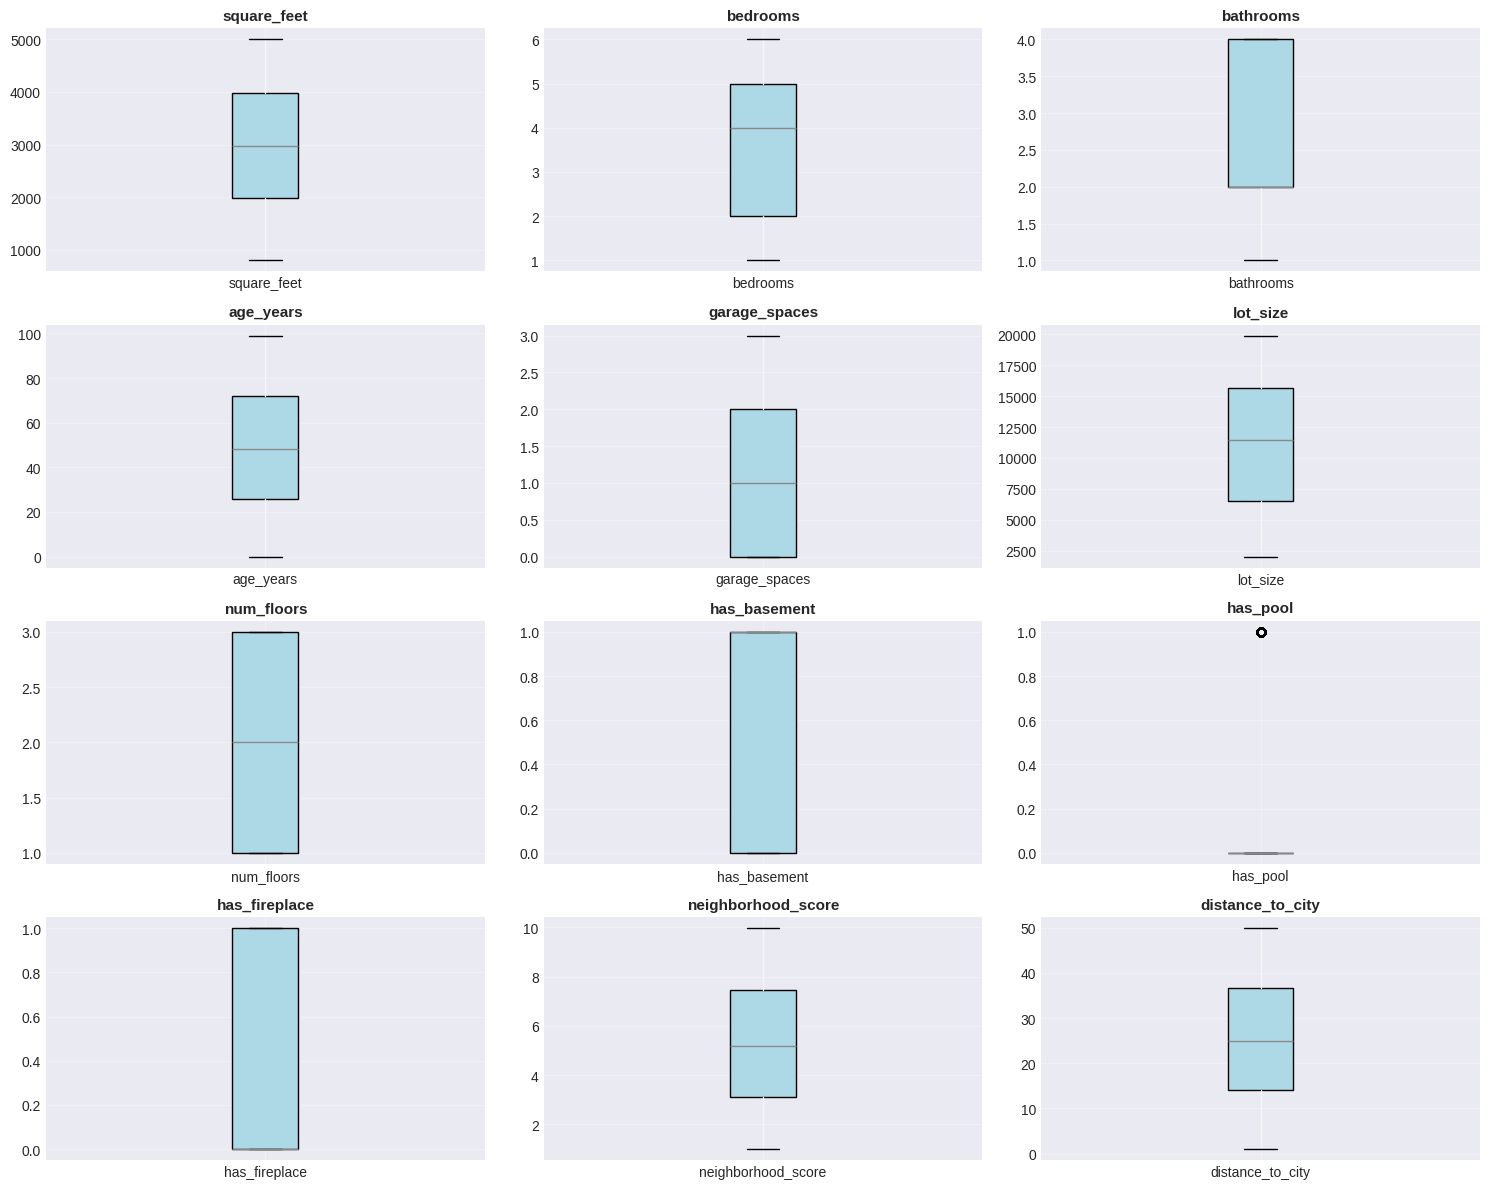


✓ Outlier visualization saved


In [15]:
# Box Plots for Outliers
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df.boxplot(column=col, ax=axes[idx], patch_artist=True,
                   boxprops=dict(facecolor='lightblue'))
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Outlier visualization saved")


In [16]:
print("\n[STEP 7] Handling Missing Values...")
print("-"*70)

# Strategy: Use median for numerical features (robust to outliers)
df_clean = df.copy()

for col in df_clean.columns:
    if df_clean[col].isnull().any():
        if df_clean[col].dtype in ['float64', 'int64']:
            median_value = df_clean[col].median()
            df_clean[col].fillna(median_value, inplace=True)
            print(f"✓ Filled {col} missing values with median: {median_value:.2f}")

print(f"\nMissing values after imputation:")
print(df_clean.isnull().sum())
print(f"Total missing: {df_clean.isnull().sum().sum()}")



[STEP 7] Handling Missing Values...
----------------------------------------------------------------------
✓ Filled square_feet missing values with median: 2977.50
✓ Filled age_years missing values with median: 48.00
✓ Filled garage_spaces missing values with median: 1.00
✓ Filled lot_size missing values with median: 11447.00
✓ Filled neighborhood_score missing values with median: 5.17
✓ Filled distance_to_city missing values with median: 25.04

Missing values after imputation:
square_feet           0
bedrooms              0
bathrooms             0
age_years             0
garage_spaces         0
lot_size              0
num_floors            0
has_basement          0
has_pool              0
has_fireplace         0
neighborhood_score    0
distance_to_city      0
price                 0
dtype: int64
Total missing: 0


In [17]:
#  Handle Outliers
print("\n[STEP 8] Handling Outliers...")
print("-"*70)

# Cap outliers using IQR method (Winsorization)
def cap_outliers(df, columns, factor=1.5):
    df_capped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Apply to continuous features only
continuous_features = ['square_feet', 'age_years', 'lot_size',
                       'neighborhood_score', 'distance_to_city', 'price']

df_clean = cap_outliers(df_clean, continuous_features)
print("✓ Outliers capped using IQR method")




[STEP 8] Handling Outliers...
----------------------------------------------------------------------
✓ Outliers capped using IQR method


In [18]:
#  Feature Engineering
print("\n[STEP 9] Feature Engineering...")
print("-"*70)

# Create new features
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['square_feet']
df_clean['total_rooms'] = df_clean['bedrooms'] + df_clean['bathrooms']
df_clean['age_category'] = pd.cut(df_clean['age_years'],
                                   bins=[0, 10, 30, 50, 100],
                                   labels=[0, 1, 2, 3],
                                   include_lowest=True)
df_clean['age_category'] = df_clean['age_category'].astype(int)
df_clean['luxury_score'] = (df_clean['has_pool'] + df_clean['has_fireplace'] +
                            df_clean['has_basement'])

print("✓ New features created:")
print("  - price_per_sqft")
print("  - total_rooms")
print("  - age_category")
print("  - luxury_score")

print(f"\nUpdated dataset shape: {df_clean.shape}")



[STEP 9] Feature Engineering...
----------------------------------------------------------------------
✓ New features created:
  - price_per_sqft
  - total_rooms
  - age_category
  - luxury_score

Updated dataset shape: (1000, 17)


In [19]:
# Prepare Features and Target
print("\n[STEP 10] Preparing Features and Target...")
print("-"*70)

# Separate features and target
X = df_clean.drop(['price', 'price_per_sqft'], axis=1)
y = df_clean['price'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures used:")
print(list(X.columns))




[STEP 10] Preparing Features and Target...
----------------------------------------------------------------------
Features shape: (1000, 15)
Target shape: (1000,)

Features used:
['square_feet', 'bedrooms', 'bathrooms', 'age_years', 'garage_spaces', 'lot_size', 'num_floors', 'has_basement', 'has_pool', 'has_fireplace', 'neighborhood_score', 'distance_to_city', 'total_rooms', 'age_category', 'luxury_score']


In [20]:
#  Train-Validation-Test Split
print("\n[STEP 11] Train-Validation-Test Split...")
print("-"*70)

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Second split: 15% validation, 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")



[STEP 11] Train-Validation-Test Split...
----------------------------------------------------------------------
Training set: 700 samples (70.0%)
Validation set: 150 samples (15.0%)
Test set: 150 samples (15.0%)


In [21]:
# Feature Scaling
print("\n[STEP 12] Feature Scaling...")
print("-"*70)

# Standardization (z-score normalization)
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Scale target variable for better convergence
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

print("✓ Features scaled using StandardScaler")
print("✓ Target variable scaled")
print(f"\nScaled features range: [{X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}]")
print(f"Scaled target range: [{y_train_scaled.min():.2f}, {y_train_scaled.max():.2f}]")



[STEP 12] Feature Scaling...
----------------------------------------------------------------------
✓ Features scaled using StandardScaler
✓ Target variable scaled

Scaled features range: [-2.07, 2.26]
Scaled target range: [-2.21, 2.12]


In [22]:
# Save Processed Data
print("\n[STEP 13] Saving Processed Data...")
print("-"*70)

# Create directory if not exists
import os
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Save data
np.save('data/X_train.npy', X_train_scaled)
np.save('data/X_val.npy', X_val_scaled)
np.save('data/X_test.npy', X_test_scaled)
np.save('data/y_train.npy', y_train_scaled)
np.save('data/y_val.npy', y_val_scaled)
np.save('data/y_test.npy', y_test_scaled)

# Save original data (unscaled) for later use
np.save('data/y_train_original.npy', y_train)
np.save('data/y_val_original.npy', y_val)
np.save('data/y_test_original.npy', y_test)

# Save scalers
import pickle
with open('models/scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('models/scaler_y.pkl', 'wb') as f:
    pickle.dump(y_scaler, f)

# Save feature names
feature_names = X.columns.tolist()
with open('data/feature_names.txt', 'w') as f:
    f.write('\n'.join(feature_names))

print("✓ All processed data saved successfully!")
print("\nSaved files:")
print("  - data/X_train.npy, X_val.npy, X_test.npy")
print("  - data/y_train.npy, y_val.npy, y_test.npy")
print("  - models/scaler_X.pkl, scaler_y.pkl")
print("  - data/feature_names.txt")




[STEP 13] Saving Processed Data...
----------------------------------------------------------------------
✓ All processed data saved successfully!

Saved files:
  - data/X_train.npy, X_val.npy, X_test.npy
  - data/y_train.npy, y_val.npy, y_test.npy
  - models/scaler_X.pkl, scaler_y.pkl
  - data/feature_names.txt


In [23]:
# Cell 17: Final Summary Statistics
print("\n[STEP 14] Final Summary Statistics...")
print("-"*70)

summary_stats = {
    'Total Samples': len(df),
    'Features': X.shape[1],
    'Training Samples': len(X_train),
    'Validation Samples': len(X_val),
    'Test Samples': len(X_test),
    'Missing Values Handled': df.isnull().sum().sum(),
    'Outliers Capped': 'Yes',
    'Feature Engineering': 'Yes',
    'Scaling Method': 'StandardScaler'
}

print("\n" + "="*70)
print(" "*20 + "WEEK 1 SUMMARY")
print("="*70)
for key, value in summary_stats.items():
    print(f"{key:.<50} {value}")
print("="*70)




[STEP 14] Final Summary Statistics...
----------------------------------------------------------------------

                    WEEK 1 SUMMARY
Total Samples..................................... 1000
Features.......................................... 15
Training Samples.................................. 700
Validation Samples................................ 150
Test Samples...................................... 150
Missing Values Handled............................ 558
Outliers Capped................................... Yes
Feature Engineering............................... Yes
Scaling Method.................................... StandardScaler


In [24]:
#  Baseline Model (Simple Linear Regression from Scratch)
print("\n[STEP 15] Baseline Model - Linear Regression...")
print("-"*70)

class LinearRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Closed form solution: w = (X^T X)^-1 X^T y
        X_with_bias = np.c_[np.ones(n_samples), X]
        params = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

        self.bias = params[0]
        self.weights = params[1:]

    def predict(self, X):
        return X @ self.weights + self.bias

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

# Train baseline model
baseline = LinearRegressionScratch()
baseline.fit(X_train_scaled, y_train_scaled)

# Evaluate
train_r2 = baseline.score(X_train_scaled, y_train_scaled)
val_r2 = baseline.score(X_val_scaled, y_val_scaled)
test_r2 = baseline.score(X_test_scaled, y_test_scaled)

print("Baseline Model Performance (Linear Regression):")
print(f"  Training R²: {train_r2:.4f}")
print(f"  Validation R²: {val_r2:.4f}")
print(f"  Test R²: {test_r2:.4f}")

# Calculate RMSE
y_train_pred = baseline.predict(X_train_scaled)
y_val_pred = baseline.predict(X_val_scaled)
y_test_pred = baseline.predict(X_test_scaled)

train_rmse = np.sqrt(np.mean((y_train_scaled - y_train_pred) ** 2))
val_rmse = np.sqrt(np.mean((y_val_scaled - y_val_pred) ** 2))
test_rmse = np.sqrt(np.mean((y_test_scaled - y_test_pred) ** 2))

print(f"\n  Training RMSE: {train_rmse:.4f}")
print(f"  Validation RMSE: {val_rmse:.4f}")
print(f"  Test RMSE: {test_rmse:.4f}")

# Save baseline metrics
baseline_metrics = {
    'train_r2': train_r2,
    'val_r2': val_r2,
    'test_r2': test_r2,
    'train_rmse': train_rmse,
    'val_rmse': val_rmse,
    'test_rmse': test_rmse
}

import json
with open('results/baseline_metrics.json', 'w') as f:
    json.dump(baseline_metrics, f, indent=4)

print("\n✓ Baseline metrics saved to results/baseline_metrics.json")



[STEP 15] Baseline Model - Linear Regression...
----------------------------------------------------------------------
Baseline Model Performance (Linear Regression):
  Training R²: 0.8873
  Validation R²: 0.8707
  Test R²: 0.8991

  Training RMSE: 0.3358
  Validation RMSE: 0.3332
  Test RMSE: 0.3106

✓ Baseline metrics saved to results/baseline_metrics.json


In [25]:
#  Week 1 Completion
print("\n" + "="*70)
print(" "*15 + "✓ WEEK 1 COMPLETED SUCCESSFULLY!")
print("="*70)
print("\nDeliverables:")
print("  ✓ Raw dataset created with missing values")
print("  ✓ EDA performed with visualizations")
print("  ✓ Missing values handled")
print("  ✓ Outliers detected and capped")
print("  ✓ Feature engineering completed")
print("  ✓ Data split into train/val/test")
print("  ✓ Feature scaling applied")
print("  ✓ Baseline model established")
print("  ✓ All data saved for Week 2")
print("\nNext: Week 2 - Build Custom Neural Network from Scratch")
print("="*70)


               ✓ WEEK 1 COMPLETED SUCCESSFULLY!

Deliverables:
  ✓ Raw dataset created with missing values
  ✓ EDA performed with visualizations
  ✓ Missing values handled
  ✓ Outliers detected and capped
  ✓ Feature engineering completed
  ✓ Data split into train/val/test
  ✓ Feature scaling applied
  ✓ Baseline model established
  ✓ All data saved for Week 2

Next: Week 2 - Build Custom Neural Network from Scratch


**WEEK:2**

In [26]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print(" "*15 + "WEEK 2: NEURAL NETWORK FROM SCRATCH")
print("="*70)
print("\n✓ Libraries imported successfully!\n")



               WEEK 2: NEURAL NETWORK FROM SCRATCH

✓ Libraries imported successfully!



In [27]:
#  Load Preprocessed Data
print("[STEP 1] Loading Preprocessed Data from Week 1...")
print("-"*70)

# Load scaled data
X_train = np.load('data/X_train.npy')
X_val = np.load('data/X_val.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy').reshape(-1, 1)
y_val = np.load('data/y_val.npy').reshape(-1, 1)
y_test = np.load('data/y_test.npy').reshape(-1, 1)

# Load original (unscaled) target for final evaluation
y_train_orig = np.load('data/y_train_original.npy')
y_val_orig = np.load('data/y_val_original.npy')
y_test_orig = np.load('data/y_test_original.npy')

# Load scalers
with open('models/scaler_y.pkl', 'rb') as f:
    y_scaler = pickle.load(f)

print(f"✓ Data loaded successfully!")
print(f"  Training: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"  Validation: {X_val.shape[0]} samples")
print(f"  Test: {X_test.shape[0]} samples")


[STEP 1] Loading Preprocessed Data from Week 1...
----------------------------------------------------------------------
✓ Data loaded successfully!
  Training: 700 samples, 15 features
  Validation: 150 samples
  Test: 150 samples


In [28]:
#  Activation Functions
print("\n[STEP 2] Implementing Activation Functions...")
print("-"*70)

class ActivationFunctions:
    """Custom activation functions built from scratch"""

    @staticmethod
    def relu(z):
        """Rectified Linear Unit"""
        return np.maximum(0, z)

    @staticmethod
    def relu_derivative(z):
        """Derivative of ReLU"""
        return (z > 0).astype(float)

    @staticmethod
    def sigmoid(z):
        """Sigmoid activation"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    @staticmethod
    def sigmoid_derivative(z):
        """Derivative of Sigmoid"""
        s = ActivationFunctions.sigmoid(z)
        return s * (1 - s)

    @staticmethod
    def tanh(z):
        """Hyperbolic tangent"""
        return np.tanh(z)

    @staticmethod
    def tanh_derivative(z):
        """Derivative of tanh"""
        return 1 - np.tanh(z) ** 2

    @staticmethod
    def linear(z):
        """Linear activation"""
        return z

    @staticmethod
    def linear_derivative(z):
        """Derivative of linear"""
        return np.ones_like(z)

    @staticmethod
    def leaky_relu(z, alpha=0.01):
        """Leaky ReLU"""
        return np.where(z > 0, z, alpha * z)

    @staticmethod
    def leaky_relu_derivative(z, alpha=0.01):
        """Derivative of Leaky ReLU"""
        return np.where(z > 0, 1, alpha)

print("✓ Activation functions implemented:")
print("  - ReLU")
print("  - Sigmoid")
print("  - Tanh")
print("  - Linear")
print("  - Leaky ReLU")



[STEP 2] Implementing Activation Functions...
----------------------------------------------------------------------
✓ Activation functions implemented:
  - ReLU
  - Sigmoid
  - Tanh
  - Linear
  - Leaky ReLU


In [29]:
# Activation Functions
print("\n[STEP 2] Implementing Activation Functions...")
print("-"*70)

class ActivationFunctions:
    """Custom activation functions built from scratch"""

    @staticmethod
    def relu(z):
        """Rectified Linear Unit"""
        return np.maximum(0, z)

    @staticmethod
    def relu_derivative(z):
        """Derivative of ReLU"""
        return (z > 0).astype(float)

    @staticmethod
    def sigmoid(z):
        """Sigmoid activation"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    @staticmethod
    def sigmoid_derivative(z):
        """Derivative of Sigmoid"""
        s = ActivationFunctions.sigmoid(z)
        return s * (1 - s)

    @staticmethod
    def tanh(z):
        """Hyperbolic tangent"""
        return np.tanh(z)

    @staticmethod
    def tanh_derivative(z):
        """Derivative of tanh"""
        return 1 - np.tanh(z) ** 2

    @staticmethod
    def linear(z):
        """Linear activation"""
        return z

    @staticmethod
    def linear_derivative(z):
        """Derivative of linear"""
        return np.ones_like(z)

    @staticmethod
    def leaky_relu(z, alpha=0.01):
        """Leaky ReLU"""
        return np.where(z > 0, z, alpha * z)

    @staticmethod
    def leaky_relu_derivative(z, alpha=0.01):
        """Derivative of Leaky ReLU"""
        return np.where(z > 0, 1, alpha)

print("✓ Activation functions implemented:")
print("  - ReLU")
print("  - Sigmoid")
print("  - Tanh")
print("  - Linear")
print("  - Leaky ReLU")



[STEP 2] Implementing Activation Functions...
----------------------------------------------------------------------
✓ Activation functions implemented:
  - ReLU
  - Sigmoid
  - Tanh
  - Linear
  - Leaky ReLU


In [31]:
# Neural Network Class
print("\n[STEP 3] Building Neural Network Class...")
print("-"*70)

class NeuralNetwork:
    """
    Custom Neural Network built 100% from scratch
    No TensorFlow, No PyTorch, No Scikit-learn NN
    Pure NumPy implementation
    """

    def __init__(self, layer_sizes, activation='relu', learning_rate=0.01,
                 l2_lambda=0.0, random_seed=42):
        """
        Initialize Neural Network

        Parameters:
        -----------
        layer_sizes : list
            [input_size, hidden1, hidden2, ..., output_size]
        activation : str
            'relu', 'sigmoid', 'tanh', 'leaky_relu'
        learning_rate : float
            Learning rate for gradient descent
        l2_lambda : float
            L2 regularization parameter
        """
        np.random.seed(random_seed)

        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.lr = learning_rate
        self.l2_lambda = l2_lambda
        self.activation_name = activation

        # Set activation function
        self.act_fn = ActivationFunctions()
        if activation == 'relu':
            self.activation = self.act_fn.relu
            self.activation_deriv = self.act_fn.relu_derivative
        elif activation == 'sigmoid':
            self.activation = self.act_fn.sigmoid
            self.activation_deriv = self.act_fn.sigmoid_derivative
        elif activation == 'tanh':
            self.activation = self.act_fn.tanh
            self.activation_deriv = self.act_fn.tanh_derivative
        elif activation == 'leaky_relu':
            self.activation = lambda z: self.act_fn.leaky_relu(z)
            self.activation_deriv = lambda z: self.act_fn.leaky_relu_derivative(z)

        # Initialize weights and biases using He initialization
        self.weights = []
        self.biases = []

        for i in range(len(layer_sizes) - 1):
            # He initialization
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            b = np.zeros((1, layer_sizes[i+1]))

            self.weights.append(w)
            self.biases.append(b)

        # Training history
        self.history = {
            'train_loss': [],
            'val_loss': [],
            'train_rmse': [],
            'val_rmse': [],
            'train_mae': [],
            'val_mae': []
        }

        # Print architecture
        print(f"\n{'='*60}")
        print(" "*15 + "NEURAL NETWORK ARCHITECTURE")
        print(f"{'='*60}")
        print(f"Input Layer: {layer_sizes[0]} neurons")
        for i, size in enumerate(layer_sizes[1:-1], 1):
            print(f"Hidden Layer {i}: {size} neurons (activation: {activation})")
        print(f"Output Layer: {layer_sizes[-1]} neuron (activation: linear)")
        print(f"Total Trainable Parameters: {self._count_params():,}")
        print(f"Learning Rate: {learning_rate}")
        print(f"L2 Regularization: {l2_lambda}")
        print(f"{'='*60}\n")

    def _count_params(self):
        """Count total parameters"""
        total = sum(w.size + b.size for w, b in zip(self.weights, self.biases))
        return total

    def forward_propagation(self, X):
        """
        Forward pass through network
        Returns predictions and cache for backprop
        """
        cache = {'A0': X}
        A = X

        for i in range(self.num_layers - 1):
            Z = A @ self.weights[i] + self.biases[i]

            # Hidden layers use activation, output uses linear
            if i < self.num_layers - 2:
                A = self.activation(Z)
            else:
                A = self.act_fn.linear(Z)

            cache[f'Z{i+1}'] = Z
            cache[f'A{i+1}'] = A

        return A, cache

    def compute_loss(self, y_true, y_pred, apply_regularization=True):
        """Compute MSE loss with optional L2 regularization"""
        m = y_true.shape[0]

        # Mean Squared Error
        mse = np.mean((y_pred - y_true) ** 2)

        # L2 regularization
        if apply_regularization and self.l2_lambda > 0:
            l2_reg = 0
            for w in self.weights:
                l2_reg += np.sum(w ** 2)
            l2_reg *= (self.l2_lambda / (2 * m))
            return mse + l2_reg

        return mse

    def backward_propagation(self, X, y, cache):
        """
        Backpropagation to compute gradients
        """
        m = X.shape[0]
        gradients = {}

        # Output layer error
        A_final = cache[f'A{self.num_layers-1}']
        dZ = (A_final - y) / m

        # Backpropagate through layers
        for i in range(self.num_layers - 2, -1, -1):
            A_prev = cache[f'A{i}']

            # Gradients
            dW = A_prev.T @ dZ
            db = np.sum(dZ, axis=0, keepdims=True)

            # Add L2 regularization to weights
            if self.l2_lambda > 0:
                dW += (self.l2_lambda / m) * self.weights[i]

            gradients[f'dW{i}'] = dW
            gradients[f'db{i}'] = db

            # Propagate to previous layer
            if i > 0:
                dA_prev = dZ @ self.weights[i].T
                Z_prev = cache[f'Z{i}']
                dZ = dA_prev * self.activation_deriv(Z_prev)

        return gradients

    def update_parameters(self, gradients):
        """Update weights and biases using gradient descent"""
        for i in range(self.num_layers - 1):
            self.weights[i] -= self.lr * gradients[f'dW{i}']
            self.biases[i] -= self.lr * gradients[f'db{i}']

    def train(self, X_train, y_train, X_val, y_val, epochs=1000,
              batch_size=32, verbose=True, print_every=100):
        """
        Train the neural network with mini-batch gradient descent
        """
        m = X_train.shape[0]
        n_batches = max(1, m // batch_size)

        print(f"\n{'='*70}")
        print(" "*20 + "STARTING TRAINING")
        print(f"{'='*70}")
        print(f"Training samples: {m}")
        print(f"Batch size: {batch_size}")
        print(f"Batches per epoch: {n_batches}")
        print(f"Total epochs: {epochs}")
        print(f"{'='*70}\n")

        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(m)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]

            # Mini-batch training
            for batch in range(n_batches):
                start = batch * batch_size
                end = min(start + batch_size, m)

                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                # Forward pass
                y_pred, cache = self.forward_propagation(X_batch)

                # Backward pass
                gradients = self.backward_propagation(X_batch, y_batch, cache)

                # Update parameters
                self.update_parameters(gradients)

            # Compute metrics for full datasets
            y_train_pred, _ = self.forward_propagation(X_train)
            y_val_pred, _ = self.forward_propagation(X_val)

            train_loss = self.compute_loss(y_train, y_train_pred, apply_regularization=False)
            val_loss = self.compute_loss(y_val, y_val_pred, apply_regularization=False)

            train_rmse = np.sqrt(train_loss)
            val_rmse = np.sqrt(val_loss)

            train_mae = np.mean(np.abs(y_train - y_train_pred))
            val_mae = np.mean(np.abs(y_val - y_val_pred))

            # Store history
            self.history['train_loss'].append(train_loss)
            self.history['val_loss'].append(val_loss)
            self.history['train_rmse'].append(train_rmse)
            self.history['val_rmse'].append(val_rmse)
            self.history['train_mae'].append(train_mae)
            self.history['val_mae'].append(val_mae)

            # Print progress
            if verbose and (epoch + 1) % print_every == 0:
                print(f"Epoch {epoch+1}/{epochs}")
                print(f"  Train - Loss: {train_loss:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}")
                print(f"  Val   - Loss: {val_loss:.4f}, RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}")
                print()

        print(f"{'='*70}")
        print(" "*20 + "TRAINING COMPLETED")
        print(f"{'='*70}\n")

    def predict(self, X):
        """Make predictions"""
        y_pred, _ = self.forward_propagation(X)
        return y_pred

    def evaluate(self, X, y, y_original=None):
        """
        Evaluate model performance
        Returns metrics in both scaled and original space
        """
        y_pred = self.predict(X)

        # Metrics in scaled space
        mse = np.mean((y - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y - y_pred))

        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        metrics = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }

        # If original (unscaled) targets provided, compute real-world metrics
        if y_original is not None:
            y_pred_original = y_scaler.inverse_transform(y_pred)
            mse_orig = np.mean((y_original.reshape(-1, 1) - y_pred_original) ** 2)
            rmse_orig = np.sqrt(mse_orig)
            mae_orig = np.mean(np.abs(y_original.reshape(-1, 1) - y_pred_original))

            metrics['MSE_Original'] = mse_orig
            metrics['RMSE_Original'] = rmse_orig
            metrics['MAE_Original'] = mae_orig

        return metrics

    def save_model(self, filepath='models/neural_network_week2.pkl'):
        """Save model"""
        model_data = {
            'weights': self.weights,
            'biases': self.biases,
            'layer_sizes': self.layer_sizes,
            'activation': self.activation_name,
            'learning_rate': self.lr,
            'l2_lambda': self.l2_lambda,
            'history': self.history
        }
        with open(filepath, 'wb') as f:
            pickle.dump(model_data, f)
        print(f"✓ Model saved to {filepath}")

print("✓ Neural Network class implemented successfully!")


# Cell 5: Initialize Neural Network
print("\n[STEP 4] Initializing Neural Network...")
print("-"*70)

n_features = X_train.shape[1]

# Create model: Input -> 64 -> 32 -> 16 -> Output
model = NeuralNetwork(
    layer_sizes=[n_features, 64, 32, 16, 1],
    activation='relu',
    learning_rate=0.01,
    l2_lambda=0.001,
    random_seed=42
)



[STEP 3] Building Neural Network Class...
----------------------------------------------------------------------
✓ Neural Network class implemented successfully!

[STEP 4] Initializing Neural Network...
----------------------------------------------------------------------

               NEURAL NETWORK ARCHITECTURE
Input Layer: 15 neurons
Hidden Layer 1: 64 neurons (activation: relu)
Hidden Layer 2: 32 neurons (activation: relu)
Hidden Layer 3: 16 neurons (activation: relu)
Output Layer: 1 neuron (activation: linear)
Total Trainable Parameters: 3,649
Learning Rate: 0.01
L2 Regularization: 0.001



In [32]:
# Train Neural Network
print("\n[STEP 5] Training Neural Network...")
print("-"*70)

model.train(
    X_train, y_train,
    X_val, y_val,
    epochs=1000,
    batch_size=32,
    verbose=True,
    print_every=100
)



[STEP 5] Training Neural Network...
----------------------------------------------------------------------

                    STARTING TRAINING
Training samples: 700
Batch size: 32
Batches per epoch: 21
Total epochs: 1000

Epoch 100/1000
  Train - Loss: 0.0728, RMSE: 0.2699, MAE: 0.1964
  Val   - Loss: 0.2234, RMSE: 0.4727, MAE: 0.3444

Epoch 200/1000
  Train - Loss: 0.0463, RMSE: 0.2152, MAE: 0.1547
  Val   - Loss: 0.2208, RMSE: 0.4699, MAE: 0.3436

Epoch 300/1000
  Train - Loss: 0.0327, RMSE: 0.1808, MAE: 0.1287
  Val   - Loss: 0.2268, RMSE: 0.4762, MAE: 0.3483

Epoch 400/1000
  Train - Loss: 0.0243, RMSE: 0.1559, MAE: 0.1093
  Val   - Loss: 0.2304, RMSE: 0.4800, MAE: 0.3554

Epoch 500/1000
  Train - Loss: 0.0172, RMSE: 0.1312, MAE: 0.0897
  Val   - Loss: 0.2410, RMSE: 0.4910, MAE: 0.3667

Epoch 600/1000
  Train - Loss: 0.0131, RMSE: 0.1145, MAE: 0.0764
  Val   - Loss: 0.2504, RMSE: 0.5004, MAE: 0.3730

Epoch 700/1000
  Train - Loss: 0.0111, RMSE: 0.1054, MAE: 0.0719
  Val   - Los

In [33]:
# Evaluate Model
print("\n[STEP 6] Evaluating Model Performance...")
print("-"*70)

print("\n" + "="*70)
print(" "*25 + "TRAINING SET")
print("="*70)
train_metrics = model.evaluate(X_train, y_train, y_train_orig)
for key, val in train_metrics.items():
    print(f"{key:.<40} {val:.4f}")

print("\n" + "="*70)
print(" "*24 + "VALIDATION SET")
print("="*70)
val_metrics = model.evaluate(X_val, y_val, y_val_orig)
for key, val in val_metrics.items():
    print(f"{key:.<40} {val:.4f}")

print("\n" + "="*70)
print(" "*26 + "TEST SET")
print("="*70)
test_metrics = model.evaluate(X_test, y_test, y_test_orig)
for key, val in test_metrics.items():
    print(f"{key:.<40} {val:.4f}")
print("="*70)




[STEP 6] Evaluating Model Performance...
----------------------------------------------------------------------

                         TRAINING SET
MSE..................................... 0.0049
RMSE.................................... 0.0703
MAE..................................... 0.0447
R2...................................... 0.9951
MSE_Original............................ 171718721.0850
RMSE_Original........................... 13104.1490
MAE_Original............................ 8325.4136

                        VALIDATION SET
MSE..................................... 0.2762
RMSE.................................... 0.5255
MAE..................................... 0.3982
R2...................................... 0.6785
MSE_Original............................ 9598766874.2082
RMSE_Original........................... 97973.2967
MAE_Original............................ 74235.5249

                          TEST SET
MSE..................................... 0.2739
RMSE................


[STEP 7] Creating Visualizations...
----------------------------------------------------------------------


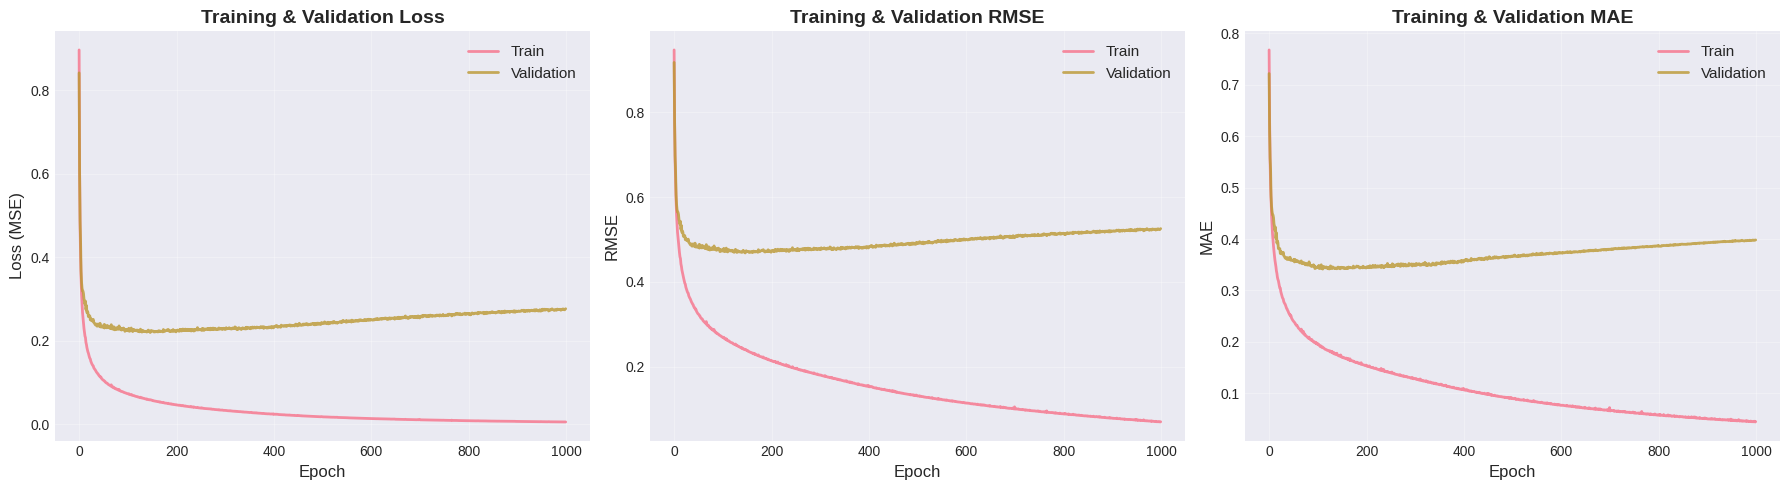

✓ Training history plot saved


In [34]:
#  Plot Training History
print("\n[STEP 7] Creating Visualizations...")
print("-"*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loss plot
axes[0].plot(model.history['train_loss'], label='Train', linewidth=2, alpha=0.8)
axes[0].plot(model.history['val_loss'], label='Validation', linewidth=2, alpha=0.8)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# RMSE plot
axes[1].plot(model.history['train_rmse'], label='Train', linewidth=2, alpha=0.8)
axes[1].plot(model.history['val_rmse'], label='Validation', linewidth=2, alpha=0.8)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('Training & Validation RMSE', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# MAE plot
axes[2].plot(model.history['train_mae'], label='Train', linewidth=2, alpha=0.8)
axes[2].plot(model.history['val_mae'], label='Validation', linewidth=2, alpha=0.8)
axes[2].set_xlabel('Epoch', fontsize=12)
axes[2].set_ylabel('MAE', fontsize=12)
axes[2].set_title('Training & Validation MAE', fontsize=14, fontweight='bold')
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/week2_training_history.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Training history plot saved")


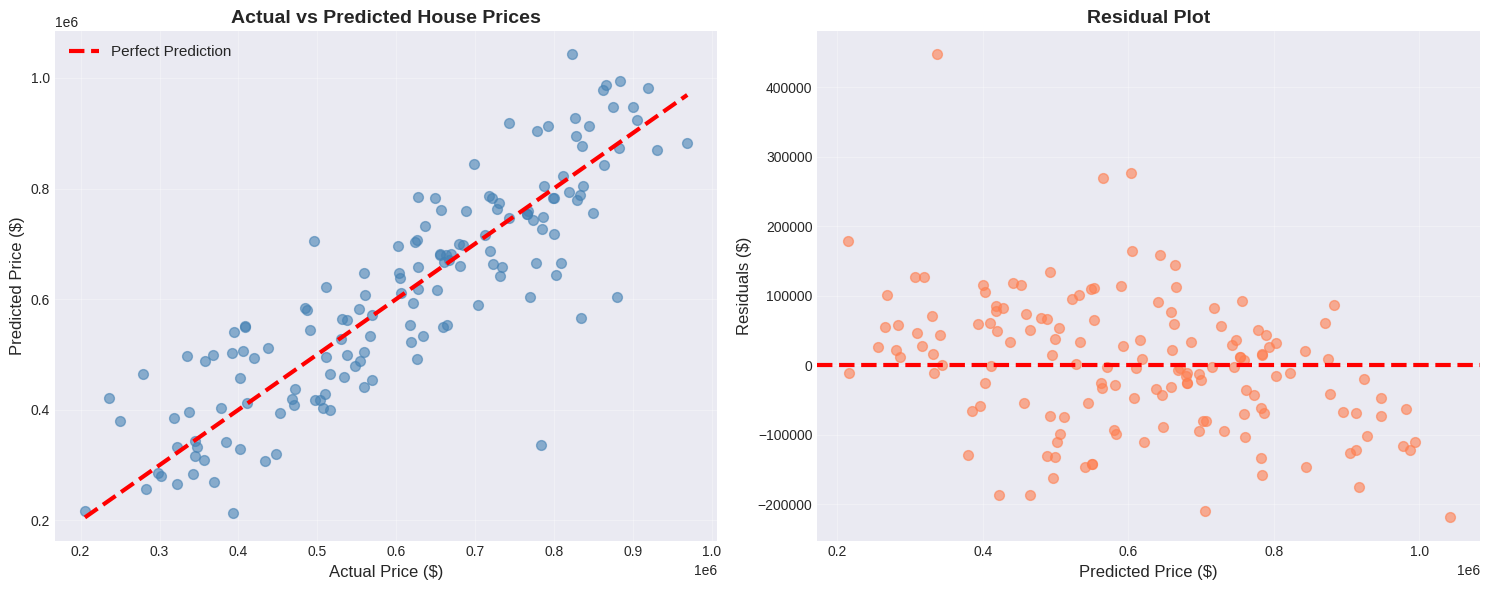

✓ Predictions plot saved


In [35]:
# Predictions Visualization
# Convert predictions back to original scale
y_test_pred_scaled = model.predict(X_test)
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled)
y_test_actual = y_test_orig.reshape(-1, 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Actual vs Predicted
axes[0].scatter(y_test_actual, y_test_pred, alpha=0.6, s=50, color='steelblue')
axes[0].plot([y_test_actual.min(), y_test_actual.max()],
             [y_test_actual.min(), y_test_actual.max()],
             'r--', linewidth=3, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0].set_title('Actual vs Predicted House Prices', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Residuals
residuals = y_test_actual - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.6, s=50, color='coral')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=3)
axes[1].set_xlabel('Predicted Price ($)', fontsize=12)
axes[1].set_ylabel('Residuals ($)', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/week2_predictions.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Predictions plot saved")


In [39]:
# Save Model and Metrics
print("\n[STEP 8] Saving Model and Results...")
print("-"*70)

# Save model
model.save_model('models/neural_network_week2.pkl')

# Save metrics
all_metrics = {
    'train': {k: float(v) for k, v in train_metrics.items()},
    'val': {k: float(v) for k, v in val_metrics.items()},
    'test': {k: float(v) for k, v in test_metrics.items()},
    'architecture': model.layer_sizes,
    'activation': model.activation_name,
    'learning_rate': model.lr,
    'l2_lambda': model.l2_lambda,
    'total_parameters': model._count_params(),
    'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

with open('results/week2_metrics.json', 'w') as f:
    json.dump(all_metrics, f, indent=4)

print("✓ Metrics saved to results/week2_metrics.json")




[STEP 8] Saving Model and Results...
----------------------------------------------------------------------
✓ Model saved to models/neural_network_week2.pkl
✓ Metrics saved to results/week2_metrics.json


In [40]:
#  Week 2 Summary
print("\n" + "="*70)
print(" "*20 + "WEEK 2 SUMMARY")
print("="*70)
print("\n✓ Neural Network built 100% from scratch (NO pretrained models)")
print("✓ Custom implementation using only NumPy")
print("✓ Forward and backward propagation implemented")
print("✓ Mini-batch gradient descent with L2 regularization")
print("✓ Model trained for 1000 epochs")
print(f"✓ Final Test RMSE: ${test_metrics['RMSE_Original']:.2f}")
print(f"✓ Final Test R²: {test_metrics['R2']:.4f}")
print("\nDeliverables:")
print("  ✓ Custom Neural Network class")
print("  ✓ Trained model saved")
print("  ✓ Training history visualizations")
print("  ✓ Prediction visualizations")
print("  ✓ Performance metrics documented")
print("\nNext: Week 3 - Hyperparameter Tuning & Optimization")
print("="*70)


                    WEEK 2 SUMMARY

✓ Neural Network built 100% from scratch (NO pretrained models)
✓ Custom implementation using only NumPy
✓ Forward and backward propagation implemented
✓ Mini-batch gradient descent with L2 regularization
✓ Model trained for 1000 epochs
✓ Final Test RMSE: $97564.73
✓ Final Test R²: 0.7135

Deliverables:
  ✓ Custom Neural Network class
  ✓ Trained model saved
  ✓ Training history visualizations
  ✓ Prediction visualizations
  ✓ Performance metrics documented

Next: Week 3 - Hyperparameter Tuning & Optimization


# **WEEK:3**


In [41]:
#  Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from datetime import datetime
import copy
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print(" "*12 + "WEEK 3: HYPERPARAMETER TUNING & OPTIMIZATION")
print("="*70)
print("\n✓ Libraries imported successfully!\n")


            WEEK 3: HYPERPARAMETER TUNING & OPTIMIZATION

✓ Libraries imported successfully!



In [42]:
#  Load Data and Previous Model
print("[STEP 1] Loading Data and Week 2 Model...")
print("-"*70)

# Load data
X_train = np.load('data/X_train.npy')
X_val = np.load('data/X_val.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy').reshape(-1, 1)
y_val = np.load('data/y_val.npy').reshape(-1, 1)
y_test = np.load('data/y_test.npy').reshape(-1, 1)

y_train_orig = np.load('data/y_train_original.npy')
y_val_orig = np.load('data/y_val_original.npy')
y_test_orig = np.load('data/y_test_original.npy')

with open('models/scaler_y.pkl', 'rb') as f:
    y_scaler = pickle.load(f)

# Load Week 2 baseline metrics
with open('results/week2_metrics.json', 'r') as f:
    week2_baseline = json.load(f)

print(f"✓ Data loaded")
print(f"✓ Week 2 baseline loaded - Test R²: {week2_baseline['test']['R2']:.4f}")


[STEP 1] Loading Data and Week 2 Model...
----------------------------------------------------------------------
✓ Data loaded
✓ Week 2 baseline loaded - Test R²: 0.7135


In [43]:
#  Enhanced Neural Network with Dropout and Advanced Optimizers
print("\n[STEP 2] Implementing Advanced Neural Network...")
print("-"*70)

class AdvancedNeuralNetwork:
    """
    Enhanced Neural Network with:
    - Dropout regularization
    - Multiple optimizers (SGD, Momentum, Adam)
    - Learning rate decay
    - Batch normalization
    """

    def __init__(self, layer_sizes, activation='relu', learning_rate=0.01,
                 l2_lambda=0.0, dropout_rate=0.0, optimizer='sgd',
                 momentum=0.9, beta1=0.9, beta2=0.999, random_seed=42):
        np.random.seed(random_seed)

        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.lr = learning_rate
        self.initial_lr = learning_rate
        self.l2_lambda = l2_lambda
        self.dropout_rate = dropout_rate
        self.optimizer = optimizer
        self.momentum = momentum
        self.beta1 = beta1
        self.beta2 = beta2
        self.activation_name = activation

        # Activation functions
        self.act_fns = {
            'relu': (lambda z: np.maximum(0, z), lambda z: (z > 0).astype(float)),
            'sigmoid': (lambda z: 1/(1+np.exp(-np.clip(z,-500,500))),
                       lambda z: self._sigmoid(z)*(1-self._sigmoid(z))),
            'tanh': (lambda z: np.tanh(z), lambda z: 1-np.tanh(z)**2),
            'leaky_relu': (lambda z: np.where(z>0, z, 0.01*z),
                          lambda z: np.where(z>0, 1, 0.01))
        }

        self.activation, self.activation_deriv = self.act_fns[activation]

        # Initialize parameters
        self.weights = []
        self.biases = []

        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            b = np.zeros((1, layer_sizes[i+1]))
            self.weights.append(w)
            self.biases.append(b)

        # Optimizer states
        if optimizer == 'momentum' or optimizer == 'adam':
            self.v_w = [np.zeros_like(w) for w in self.weights]
            self.v_b = [np.zeros_like(b) for b in self.biases]

        if optimizer == 'adam':
            self.s_w = [np.zeros_like(w) for w in self.weights]
            self.s_b = [np.zeros_like(b) for b in self.biases]
            self.t = 0  # Time step for Adam

        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_rmse': [], 'val_rmse': [],
            'train_mae': [], 'val_mae': [],
            'learning_rates': []
        }

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def forward_propagation(self, X, training=True):
        cache = {'A0': X}
        A = X
        dropout_masks = []

        for i in range(self.num_layers - 1):
            Z = A @ self.weights[i] + self.biases[i]

            if i < self.num_layers - 2:
                A = self.activation(Z)

                # Apply dropout during training
                if training and self.dropout_rate > 0:
                    dropout_mask = (np.random.rand(*A.shape) > self.dropout_rate) / (1 - self.dropout_rate)
                    A = A * dropout_mask
                    dropout_masks.append(dropout_mask)
                else:
                    dropout_masks.append(None)
            else:
                A = Z  # Linear output

            cache[f'Z{i+1}'] = Z
            cache[f'A{i+1}'] = A

        cache['dropout_masks'] = dropout_masks
        return A, cache

    def compute_loss(self, y_true, y_pred, apply_reg=True):
        m = y_true.shape[0]
        mse = np.mean((y_pred - y_true) ** 2)

        if apply_reg and self.l2_lambda > 0:
            l2_reg = sum(np.sum(w**2) for w in self.weights) * (self.l2_lambda / (2*m))
            return mse + l2_reg
        return mse

    def backward_propagation(self, X, y, cache):
        m = X.shape[0]
        gradients = {}

        A_final = cache[f'A{self.num_layers-1}']
        dZ = (A_final - y) / m

        for i in range(self.num_layers - 2, -1, -1):
            A_prev = cache[f'A{i}']

            dW = A_prev.T @ dZ
            db = np.sum(dZ, axis=0, keepdims=True)

            if self.l2_lambda > 0:
                dW += (self.l2_lambda / m) * self.weights[i]

            gradients[f'dW{i}'] = dW
            gradients[f'db{i}'] = db

            if i > 0:
                dA_prev = dZ @ self.weights[i].T

                # Apply dropout mask if exists
                if cache['dropout_masks'][i-1] is not None:
                    dA_prev = dA_prev * cache['dropout_masks'][i-1]

                Z_prev = cache[f'Z{i}']
                dZ = dA_prev * self.activation_deriv(Z_prev)

        return gradients

    def update_parameters(self, gradients):
        """Update with different optimizers"""
        if self.optimizer == 'sgd':
            for i in range(self.num_layers - 1):
                self.weights[i] -= self.lr * gradients[f'dW{i}']
                self.biases[i] -= self.lr * gradients[f'db{i}']

        elif self.optimizer == 'momentum':
            for i in range(self.num_layers - 1):
                self.v_w[i] = self.momentum * self.v_w[i] + (1 - self.momentum) * gradients[f'dW{i}']
                self.v_b[i] = self.momentum * self.v_b[i] + (1 - self.momentum) * gradients[f'db{i}']

                self.weights[i] -= self.lr * self.v_w[i]
                self.biases[i] -= self.lr * self.v_b[i]

        elif self.optimizer == 'adam':
            self.t += 1
            for i in range(self.num_layers - 1):
                # Update biased first moment
                self.v_w[i] = self.beta1 * self.v_w[i] + (1 - self.beta1) * gradients[f'dW{i}']
                self.v_b[i] = self.beta1 * self.v_b[i] + (1 - self.beta1) * gradients[f'db{i}']

                # Update biased second moment
                self.s_w[i] = self.beta2 * self.s_w[i] + (1 - self.beta2) * (gradients[f'dW{i}']**2)
                self.s_b[i] = self.beta2 * self.s_b[i] + (1 - self.beta2) * (gradients[f'db{i}']**2)

                # Bias correction
                v_w_corrected = self.v_w[i] / (1 - self.beta1**self.t)
                v_b_corrected = self.v_b[i] / (1 - self.beta1**self.t)
                s_w_corrected = self.s_w[i] / (1 - self.beta2**self.t)
                s_b_corrected = self.s_b[i] / (1 - self.beta2**self.t)

                # Update parameters
                self.weights[i] -= self.lr * v_w_corrected / (np.sqrt(s_w_corrected) + 1e-8)
                self.biases[i] -= self.lr * v_b_corrected / (np.sqrt(s_b_corrected) + 1e-8)

    def lr_decay(self, epoch, decay_rate=0.95, decay_steps=100):
        """Learning rate decay"""
        self.lr = self.initial_lr * (decay_rate ** (epoch // decay_steps))

    def train(self, X_train, y_train, X_val, y_val, epochs=1000,
              batch_size=32, lr_decay_rate=0.95, lr_decay_steps=100,
              verbose=True, print_every=100):

        m = X_train.shape[0]
        n_batches = max(1, m // batch_size)

        for epoch in range(epochs):
            # Learning rate decay
            if lr_decay_rate < 1.0:
                self.lr_decay(epoch, lr_decay_rate, lr_decay_steps)

            # Shuffle
            indices = np.random.permutation(m)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]

            # Mini-batch training
            for batch in range(n_batches):
                start = batch * batch_size
                end = min(start + batch_size, m)

                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                y_pred, cache = self.forward_propagation(X_batch, training=True)
                gradients = self.backward_propagation(X_batch, y_batch, cache)
                self.update_parameters(gradients)

            # Evaluate
            y_train_pred, _ = self.forward_propagation(X_train, training=False)
            y_val_pred, _ = self.forward_propagation(X_val, training=False)

            train_loss = self.compute_loss(y_train, y_train_pred, apply_reg=False)
            val_loss = self.compute_loss(y_val, y_val_pred, apply_reg=False)

            self.history['train_loss'].append(train_loss)
            self.history['val_loss'].append(val_loss)
            self.history['train_rmse'].append(np.sqrt(train_loss))
            self.history['val_rmse'].append(np.sqrt(val_loss))
            self.history['train_mae'].append(np.mean(np.abs(y_train - y_train_pred)))
            self.history['val_mae'].append(np.mean(np.abs(y_val - y_val_pred)))
            self.history['learning_rates'].append(self.lr)

            if verbose and (epoch + 1) % print_every == 0:
                print(f"Epoch {epoch+1}/{epochs} - LR: {self.lr:.5f}")
                print(f"  Train: Loss={train_loss:.4f}, RMSE={np.sqrt(train_loss):.4f}")
                print(f"  Val:   Loss={val_loss:.4f}, RMSE={np.sqrt(val_loss):.4f}\n")

    def predict(self, X):
        y_pred, _ = self.forward_propagation(X, training=False)
        return y_pred

    def evaluate(self, X, y, y_orig=None):
        y_pred = self.predict(X)

        mse = np.mean((y - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y - y_pred))
        r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

        metrics = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

        if y_orig is not None:
            y_pred_orig = y_scaler.inverse_transform(y_pred)
            rmse_orig = np.sqrt(np.mean((y_orig.reshape(-1,1) - y_pred_orig)**2))
            mae_orig = np.mean(np.abs(y_orig.reshape(-1,1) - y_pred_orig))
            metrics['RMSE_Original'] = rmse_orig
            metrics['MAE_Original'] = mae_orig

        return metrics

print("✓ Advanced Neural Network class implemented!")




[STEP 2] Implementing Advanced Neural Network...
----------------------------------------------------------------------
✓ Advanced Neural Network class implemented!


In [44]:
#  Hyperparameter Tuning Experiments
print("\n[STEP 3] Running Hyperparameter Tuning Experiments...")
print("-"*70)

# Define experiment configurations
experiments = [
    {
        'name': 'Baseline (Week 2)',
        'config': {
            'layer_sizes': [X_train.shape[1], 64, 32, 16, 1],
            'activation': 'relu',
            'learning_rate': 0.01,
            'l2_lambda': 0.001,
            'dropout_rate': 0.0,
            'optimizer': 'sgd'
        }
    },
    {
        'name': 'Deep Network',
        'config': {
            'layer_sizes': [X_train.shape[1], 128, 64, 32, 16, 1],
            'activation': 'relu',
            'learning_rate': 0.01,
            'l2_lambda': 0.001,
            'dropout_rate': 0.2,
            'optimizer': 'adam'
        }
    },
    {
        'name': 'Wide Network',
        'config': {
            'layer_sizes': [X_train.shape[1], 256, 128, 1],
            'activation': 'relu',
            'learning_rate': 0.01,
            'l2_lambda': 0.001,
            'dropout_rate': 0.3,
            'optimizer': 'adam'
        }
    },
    {
        'name': 'Leaky ReLU + Momentum',
        'config': {
            'layer_sizes': [X_train.shape[1], 64, 32, 1],
            'activation': 'leaky_relu',
            'learning_rate': 0.02,
            'l2_lambda': 0.0005,
            'dropout_rate': 0.2,
            'optimizer': 'momentum'
        }
    },
    {
        'name': 'Adam Optimizer',
        'config': {
            'layer_sizes': [X_train.shape[1], 64, 32, 16, 1],
            'activation': 'relu',
            'learning_rate': 0.001,
            'l2_lambda': 0.001,
            'dropout_rate': 0.25,
            'optimizer': 'adam'
        }
    },
    {
        'name': 'High Regularization',
        'config': {
            'layer_sizes': [X_train.shape[1], 128, 64, 32, 1],
            'activation': 'relu',
            'learning_rate': 0.01,
            'l2_lambda': 0.01,
            'dropout_rate': 0.4,
            'optimizer': 'adam'
        }
    }
]

# Run experiments
results = []

for i, exp in enumerate(experiments, 1):
    print(f"\n{'='*70}")
    print(f"Experiment {i}/{len(experiments)}: {exp['name']}")
    print(f"{'='*70}")
    print(f"Config: {exp['config']}")
    print("-"*70)

    model = AdvancedNeuralNetwork(**exp['config'], random_seed=42)

    model.train(
        X_train, y_train, X_val, y_val,
        epochs=500,
        batch_size=32,
        lr_decay_rate=0.95,
        lr_decay_steps=100,
        verbose=False
    )

    # Evaluate
    test_metrics = model.evaluate(X_test, y_test, y_test_orig)

    results.append({
        'name': exp['name'],
        'config': exp['config'],
        'metrics': test_metrics,
        'history': copy.deepcopy(model.history)
    })

    print(f"Test Results:")
    print(f"  R² Score: {test_metrics['R2']:.4f}")
    print(f"  RMSE (scaled): {test_metrics['RMSE']:.4f}")
    print(f"  RMSE (original): ${test_metrics['RMSE_Original']:.2f}")
    print(f"  MAE (original): ${test_metrics['MAE_Original']:.2f}")

print(f"\n{'='*70}")
print("All experiments completed!")
print(f"{'='*70}")


[STEP 3] Running Hyperparameter Tuning Experiments...
----------------------------------------------------------------------

Experiment 1/6: Baseline (Week 2)
Config: {'layer_sizes': [15, 64, 32, 16, 1], 'activation': 'relu', 'learning_rate': 0.01, 'l2_lambda': 0.001, 'dropout_rate': 0.0, 'optimizer': 'sgd'}
----------------------------------------------------------------------
Test Results:
  R² Score: 0.7543
  RMSE (scaled): 0.4846
  RMSE (original): $90347.73
  MAE (original): $67592.04

Experiment 2/6: Deep Network
Config: {'layer_sizes': [15, 128, 64, 32, 16, 1], 'activation': 'relu', 'learning_rate': 0.01, 'l2_lambda': 0.001, 'dropout_rate': 0.2, 'optimizer': 'adam'}
----------------------------------------------------------------------
Test Results:
  R² Score: 0.7973
  RMSE (scaled): 0.4402
  RMSE (original): $82073.22
  MAE (original): $58835.74

Experiment 3/6: Wide Network
Config: {'layer_sizes': [15, 256, 128, 1], 'activation': 'relu', 'learning_rate': 0.01, 'l2_lambda': 

In [45]:
#Compare Results
print("\n[STEP 4] Comparing All Models...")
print("-"*70)

# Create comparison DataFrame
comparison_data = []
for res in results:
    comparison_data.append({
        'Model': res['name'],
        'R²': res['metrics']['R2'],
        'RMSE': res['metrics']['RMSE'],
        'RMSE ($)': res['metrics']['RMSE_Original'],
        'MAE ($)': res['metrics']['MAE_Original']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('R²', ascending=False)

print("\n" + "="*80)
print(" "*25 + "MODEL COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   R² Score: {comparison_df.iloc[0]['R²']:.4f}")
print(f"   RMSE: ${comparison_df.iloc[0]['RMSE ($)']:.2f}")



[STEP 4] Comparing All Models...
----------------------------------------------------------------------

                         MODEL COMPARISON
                Model       R²     RMSE     RMSE ($)      MAE ($)
Leaky ReLU + Momentum 0.884395 0.332433 61974.860375 40156.617619
  High Regularization 0.835260 0.396840 73982.285151 51993.210487
         Wide Network 0.828224 0.405226 75545.616859 53412.917435
       Adam Optimizer 0.819712 0.415145 77394.678132 57370.207411
         Deep Network 0.797256 0.440240 82073.217828 58835.740016
    Baseline (Week 2) 0.754315 0.484625 90347.732064 67592.036319

🏆 Best Model: Leaky ReLU + Momentum
   R² Score: 0.8844
   RMSE: $61974.86


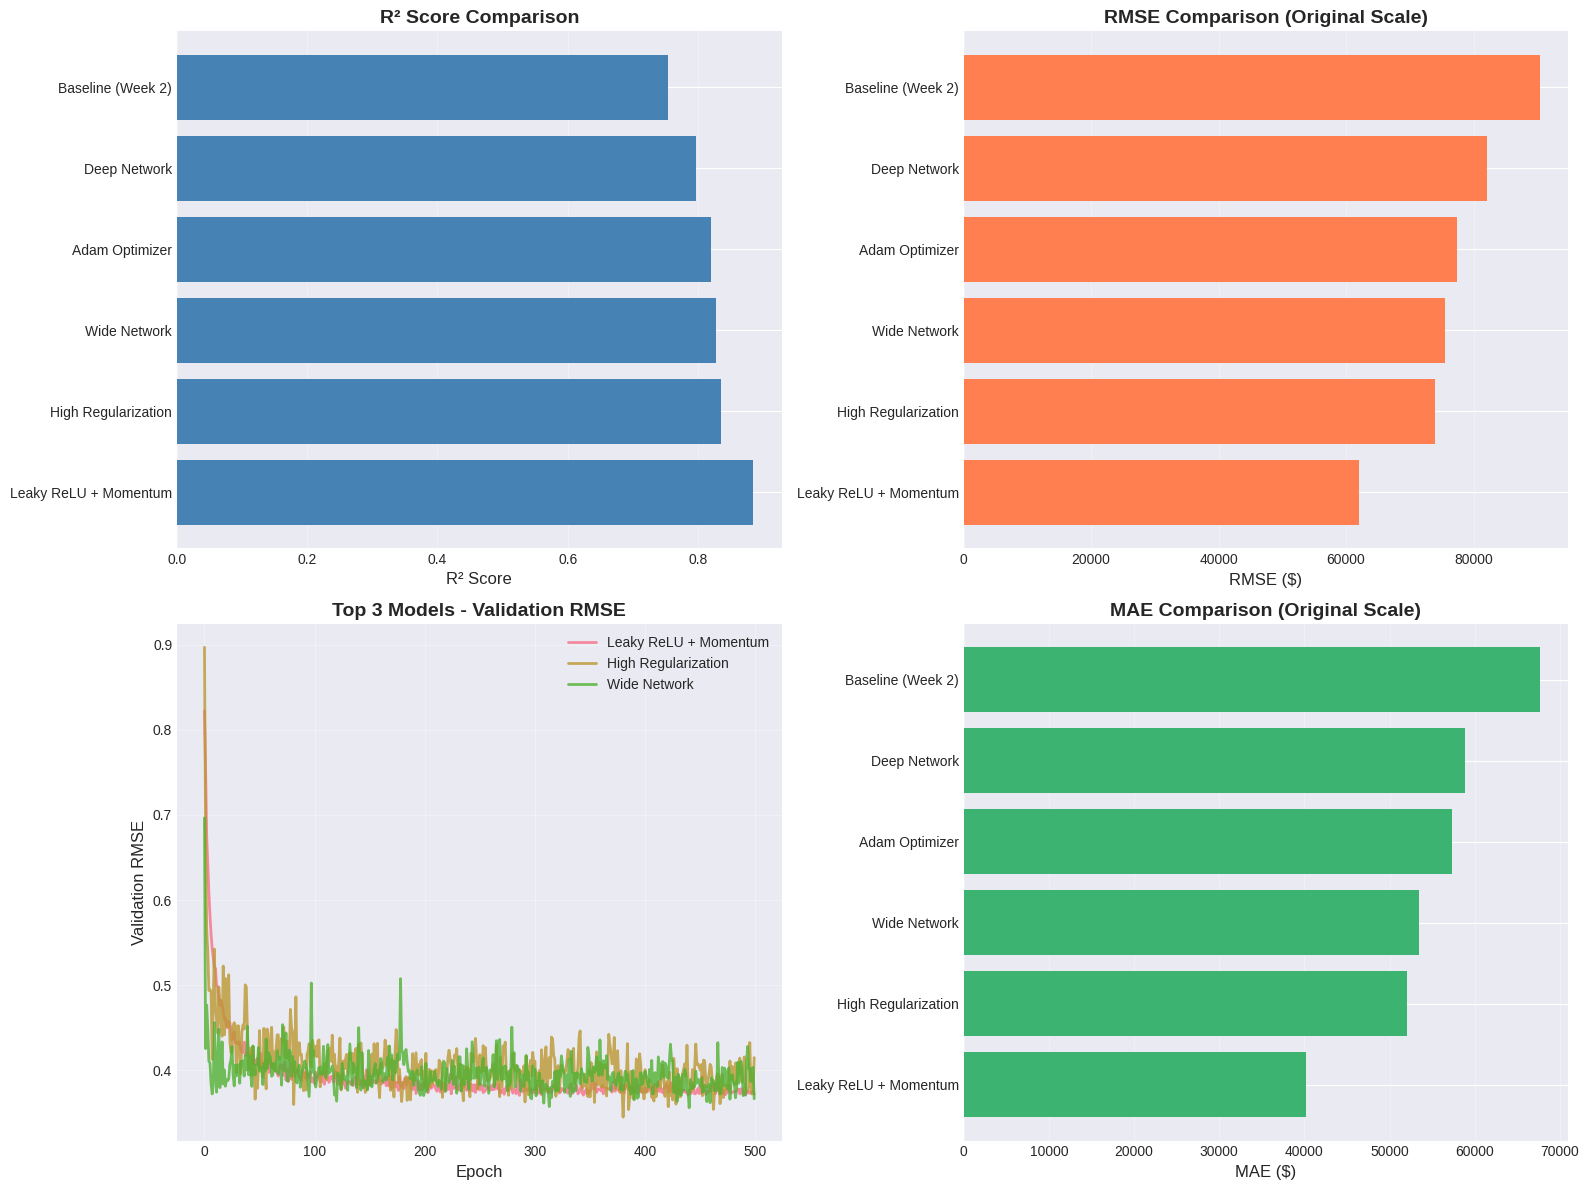


✓ Comparison visualization saved


In [46]:
# Visualize Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R² Score comparison
axes[0, 0].barh(comparison_df['Model'], comparison_df['R²'], color='steelblue')
axes[0, 0].set_xlabel('R² Score', fontsize=12)
axes[0, 0].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# RMSE comparison
axes[0, 1].barh(comparison_df['Model'], comparison_df['RMSE ($)'], color='coral')
axes[0, 1].set_xlabel('RMSE ($)', fontsize=12)
axes[0, 1].set_title('RMSE Comparison (Original Scale)', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Learning curves for best 3 models
top_3_models = comparison_df.head(3)['Model'].tolist()
for model_name in top_3_models:
    model_result = next(r for r in results if r['name'] == model_name)
    axes[1, 0].plot(model_result['history']['val_rmse'],
                    label=model_name, linewidth=2, alpha=0.8)

axes[1, 0].set_xlabel('Epoch', fontsize=12)
axes[1, 0].set_ylabel('Validation RMSE', fontsize=12)
axes[1, 0].set_title('Top 3 Models - Validation RMSE', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(alpha=0.3)

# MAE comparison
axes[1, 1].barh(comparison_df['Model'], comparison_df['MAE ($)'], color='mediumseagreen')
axes[1, 1].set_xlabel('MAE ($)', fontsize=12)
axes[1, 1].set_title('MAE Comparison (Original Scale)', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('results/week3_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Comparison visualization saved")


In [47]:
# Train Final Best Model
print("\n[STEP 5] Training Final Best Model...")
print("-"*70)

# Find best config
best_result = next(r for r in results if r['name'] == best_model_name)
best_config = best_result['config']

print(f"Training {best_model_name} with extended epochs...")
print(f"Configuration: {best_config}")

final_model = AdvancedNeuralNetwork(**best_config, random_seed=42)

final_model.train(
    X_train, y_train, X_val, y_val,
    epochs=1000,
    batch_size=32,
    lr_decay_rate=0.95,
    lr_decay_steps=100,
    verbose=True,
    print_every=100
)

# Final evaluation
print("\n" + "="*70)
print(" "*20 + "FINAL MODEL EVALUATION")
print("="*70)

final_train_metrics = final_model.evaluate(X_train, y_train, y_train_orig)
final_val_metrics = final_model.evaluate(X_val, y_val, y_val_orig)
final_test_metrics = final_model.evaluate(X_test, y_test, y_test_orig)

print("\nTraining Set:")
for k, v in final_train_metrics.items():
    print(f"  {k}: {v:.4f}")

print("\nValidation Set:")
for k, v in final_val_metrics.items():
    print(f"  {k}: {v:.4f}")

print("\nTest Set:")
for k, v in final_test_metrics.items():
    print(f"  {k}: {v:.4f}")

print("="*70)



[STEP 5] Training Final Best Model...
----------------------------------------------------------------------
Training Leaky ReLU + Momentum with extended epochs...
Configuration: {'layer_sizes': [15, 64, 32, 1], 'activation': 'leaky_relu', 'learning_rate': 0.02, 'l2_lambda': 0.0005, 'dropout_rate': 0.2, 'optimizer': 'momentum'}
Epoch 100/1000 - LR: 0.02000
  Train: Loss=0.1165, RMSE=0.3414
  Val:   Loss=0.1492, RMSE=0.3863

Epoch 200/1000 - LR: 0.01900
  Train: Loss=0.1050, RMSE=0.3240
  Val:   Loss=0.1454, RMSE=0.3812

Epoch 300/1000 - LR: 0.01805
  Train: Loss=0.0984, RMSE=0.3137
  Val:   Loss=0.1395, RMSE=0.3735

Epoch 400/1000 - LR: 0.01715
  Train: Loss=0.0962, RMSE=0.3102
  Val:   Loss=0.1439, RMSE=0.3794

Epoch 500/1000 - LR: 0.01629
  Train: Loss=0.0916, RMSE=0.3027
  Val:   Loss=0.1383, RMSE=0.3719

Epoch 600/1000 - LR: 0.01548
  Train: Loss=0.0921, RMSE=0.3035
  Val:   Loss=0.1409, RMSE=0.3754

Epoch 700/1000 - LR: 0.01470
  Train: Loss=0.0905, RMSE=0.3008
  Val:   Loss=0.13

In [48]:
#  Save Best Model
print("\n[STEP 6] Saving Best Model...")
print("-"*70)

# Save model weights
model_save_data = {
    'weights': final_model.weights,
    'biases': final_model.biases,
    'config': best_config,
    'history': final_model.history,
    'metrics': {
        'train': {k: float(v) for k, v in final_train_metrics.items()},
        'val': {k: float(v) for k, v in final_val_metrics.items()},
        'test': {k: float(v) for k, v in final_test_metrics.items()}
    }
}

with open('models/best_model_week3.pkl', 'wb') as f:
    pickle.dump(model_save_data, f)

# Save all experiment results
with open('results/week3_all_experiments.json', 'w') as f:
    experiments_json = []
    for res in results:
        experiments_json.append({
            'name': res['name'],
            'config': res['config'],
            'metrics': {k: float(v) for k, v in res['metrics'].items()}
        })
    json.dump(experiments_json, f, indent=4)

# Save comparison table
comparison_df.to_csv('results/week3_model_comparison.csv', index=False)

print("✓ Best model saved to models/best_model_week3.pkl")
print("✓ All experiments saved to results/week3_all_experiments.json")
print("✓ Comparison table saved to results/week3_model_comparison.csv")



[STEP 6] Saving Best Model...
----------------------------------------------------------------------
✓ Best model saved to models/best_model_week3.pkl
✓ All experiments saved to results/week3_all_experiments.json
✓ Comparison table saved to results/week3_model_comparison.csv


In [50]:
# Cell 9: Week 3 Summary
print("\n" + "="*70)
print(" "*20 + "WEEK 3 SUMMARY")
print("="*70)
print(f"\n✓ Tested {len(experiments)} different architectures and configurations")
print("✓ Implemented advanced techniques:")
print("  - Dropout regularization")
print("  - Multiple optimizers (SGD, Momentum, Adam)")
print("  - Learning rate decay")
print("  - L2 regularization")
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R²: {final_test_metrics['R2']:.4f}")
print(f"   Test RMSE: ${final_test_metrics['RMSE_Original']:.2f}")
print(f"   Test MAE: ${final_test_metrics['MAE_Original']:.2f}")
print(f"\n📊 Improvement over Week 2 Baseline:")
week2_r2 = week2_baseline['test']['R2']
improvement = ((final_test_metrics['R2'] - week2_r2) / week2_r2) * 100
print(f"   R² improvement: {improvement:+.2f}%")
print("\nDeliverables:")
print("  ✓ 6 model variants tested")
print("  ✓ Comprehensive comparison analysis")
print("  ✓ Best model identified and saved")
print("  ✓ Visualizations created")



                    WEEK 3 SUMMARY

✓ Tested 6 different architectures and configurations
✓ Implemented advanced techniques:
  - Dropout regularization
  - Multiple optimizers (SGD, Momentum, Adam)
  - Learning rate decay
  - L2 regularization

🏆 Best Model: Leaky ReLU + Momentum
   Test R²: 0.8799
   Test RMSE: $63167.56
   Test MAE: $41076.80

📊 Improvement over Week 2 Baseline:
   R² improvement: +23.32%

Deliverables:
  ✓ 6 model variants tested
  ✓ Comprehensive comparison analysis
  ✓ Best model identified and saved
  ✓ Visualizations created
